In [1]:
import pandas as pd
import re as re
import html

In [2]:
thread_df=pd.read_excel("C:\\Users\\tarun\\Downloads\\Sample Data\\Sample Data\\Threads.xlsx")

In [3]:
incident_df=pd.read_excel("C:\\Users\\tarun\\Downloads\\Sample Data\\Sample Data\\Incidents.xlsx")

In [4]:
thread_df.shape

(100001, 12)

In [5]:
incident_df.shape

(19409, 13)

In [6]:
thread_df.head()

,Threads,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Foreign Key,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer
2,2632,2809,No Value,No Value,05/11/2010 09:50,1983,CSS Web,No Value,1,5,Agents are experiencing an issue with Rightnow...,Customer
3,2601,2839,Stephen Pickett,No Value,11/01/2011 11:58,0,No Value,No Value,1,0,"Ad, see the attachment.",Note
4,2655,2842,No Value,No Value,12/01/2011 10:36,1243,CSS Web,No Value,1,-2,the phone display states \nNo service\nTrying ...,Customer


In [7]:
incident_df.head()

,Incidents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,Category ID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value
2,101004-000000,2601,Adam Wilkinson,No Value,Solved,Solved,Measuring effectiveness increases effectiveness,No Value,29,11/01/2011 12:07,04/10/2010 09:22,402,No Value
3,101102-000000,2619,Stephen Pickett,No Value,Solved,Solved,Infoco Answer Export Tool,RightNow,560,02/11/2010 12:05,02/11/2010 12:05,2157,No Value
4,101102-000001,2620,Chris Farmer,Medium,Solved,Solved,THA: The Family Information Direct/Helplines S...,No Value,562,24/02/2011 13:56,02/11/2010 12:46,2144,No Value


In [8]:
header_row=0
thread_df.columns = thread_df.iloc[header_row]
incident_df.columns = incident_df.iloc[header_row]
thread_df=thread_df.drop(header_row)
incident_df=incident_df.drop(header_row)

In [9]:
thread_df.head()

,Foreign Key,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer
2,2632,2809,No Value,No Value,05/11/2010 09:50,1983,CSS Web,No Value,1,5,Agents are experiencing an issue with Rightnow...,Customer
3,2601,2839,Stephen Pickett,No Value,11/01/2011 11:58,0,No Value,No Value,1,0,"Ad, see the attachment.",Note
4,2655,2842,No Value,No Value,12/01/2011 10:36,1243,CSS Web,No Value,1,-2,the phone display states \nNo service\nTrying ...,Customer
5,2655,2843,Alan Cheng,No Value,12/01/2011 11:02,0,Email,No Value,1,-48,"Had a look, appears to be a network port issue...",Staff Account


In [10]:
incident_df.head()

,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,Category ID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value
2,101004-000000,2601,Adam Wilkinson,No Value,Solved,Solved,Measuring effectiveness increases effectiveness,No Value,29,11/01/2011 12:07,04/10/2010 09:22,402,No Value
3,101102-000000,2619,Stephen Pickett,No Value,Solved,Solved,Infoco Answer Export Tool,RightNow,560,02/11/2010 12:05,02/11/2010 12:05,2157,No Value
4,101102-000001,2620,Chris Farmer,Medium,Solved,Solved,THA: The Family Information Direct/Helplines S...,No Value,562,24/02/2011 13:56,02/11/2010 12:46,2144,No Value
5,101105-000000,2632,Alan Cheng,Medium,Solved,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing,473,16/02/2011 15:09,05/11/2010 09:50,1983,No Value


In [11]:
thread_df.rename(columns={'Foreign Key':'Incident ID'}, inplace=True)
incident_df.rename(columns={'Category ID':'CategoryID'}, inplace=True)
incident_df.rename(columns={'Product ID':'ProductID'}, inplace=True)

In [12]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

In [13]:
thread_df["Text"]=thread_df["Text"].apply(lambda cw: remove_tags(cw))

In [14]:
thread_df.head()

,Incident ID,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer
2,2632,2809,No Value,No Value,05/11/2010 09:50,1983,CSS Web,No Value,1,5,Agents are experiencing an issue with Rightnow...,Customer
3,2601,2839,Stephen Pickett,No Value,11/01/2011 11:58,0,No Value,No Value,1,0,"Ad, see the attachment.",Note
4,2655,2842,No Value,No Value,12/01/2011 10:36,1243,CSS Web,No Value,1,-2,the phone display states \nNo service\nTrying ...,Customer
5,2655,2843,Alan Cheng,No Value,12/01/2011 11:02,0,Email,No Value,1,-48,"Had a look, appears to be a network port issue...",Staff Account


In [15]:
incident_df.head()

,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,ProductID,Organisation ID,Date Closed,Date Created,Contact ID,CategoryID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value
2,101004-000000,2601,Adam Wilkinson,No Value,Solved,Solved,Measuring effectiveness increases effectiveness,No Value,29,11/01/2011 12:07,04/10/2010 09:22,402,No Value
3,101102-000000,2619,Stephen Pickett,No Value,Solved,Solved,Infoco Answer Export Tool,RightNow,560,02/11/2010 12:05,02/11/2010 12:05,2157,No Value
4,101102-000001,2620,Chris Farmer,Medium,Solved,Solved,THA: The Family Information Direct/Helplines S...,No Value,562,24/02/2011 13:56,02/11/2010 12:46,2144,No Value
5,101105-000000,2632,Alan Cheng,Medium,Solved,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing,473,16/02/2011 15:09,05/11/2010 09:50,1983,No Value


In [16]:
incident_df.CategoryID.unique()

array(['No Value', 'Update process', 'Oracle', 'Sharepoint',
       'Infrastructure', 'Telephony', 'Business Process', 'Contract',
       'CiviCRM', 'Reporting', 'Not working as expected', 'Added account',
       'Updated account', 'Leaver', 'Starter', 'Update report', 'Other',
       'Slow loading/response', 'Delete a record',
       'Add new number or routing', 'New report', 'Connection error'],
      dtype=object)

In [17]:
incident_df=incident_df[incident_df['Status']=='Solved']

In [18]:
incident_df.CategoryID.unique()

array(['No Value', 'Oracle', 'Sharepoint', 'Infrastructure', 'Telephony',
       'Business Process', 'Contract', 'CiviCRM', 'Reporting',
       'Added account', 'Not working as expected', 'Updated account',
       'Leaver', 'Update process', 'Starter', 'Update report', 'Other',
       'Slow loading/response'], dtype=object)

In [19]:
incident_df.shape

(19197, 13)

In [20]:
thread_df['Text']=thread_df['Text'].str.replace('\n','').str.replace('=','')

In [21]:
inc_thread_df=thread_df[["Incident ID","Text"]].merge(incident_df[["Incident ID","Status","Subject","CategoryID","ProductID"]],on="Incident ID",how="right")

In [22]:
inc_thread_df=inc_thread_df[inc_thread_df['CategoryID']!='No Value']
inc_thread_df=inc_thread_df[inc_thread_df['ProductID']!='No Value']

In [23]:
inc_thread_df.head(20)

,Incident ID,Text,Status,Subject,CategoryID,ProductID
28152,11751.0,Hi Mike As we discussed yesterday. We wish to...,Solved,Email Verification,Oracle,Outbound E-mail
28153,11751.0,"Hi MikeThis one needs picking up please, Beth ...",Solved,Email Verification,Oracle,Outbound E-mail
28154,11751.0,Response via E-mail:From: Mike Griffiths Sent:...,Solved,Email Verification,Oracle,Outbound E-mail
28155,11751.0,Need to create a CR after speaking with Mike,Solved,Email Verification,Oracle,Outbound E-mail
28156,11751.0,"Dear Joe,Thank you for contacting Connect Assi...",Solved,Email Verification,Oracle,Outbound E-mail
28157,11751.0,"Dear Joe,Thank you for contacting Connect Assi...",Solved,Email Verification,Oracle,Outbound E-mail
28158,11751.0,"Dear Joe,We are still awaiting an update from ...",Solved,Email Verification,Oracle,Outbound E-mail
28159,11751.0,"Dear Joe,Thank you for contacting Connect Assi...",Solved,Email Verification,Oracle,Outbound E-mail
28160,11751.0,"Dear Joe,We are still awaiting an update from ...",Solved,Email Verification,Oracle,Outbound E-mail
28161,11751.0,"Dear Joe,Thank you for contacting Connect Assi...",Solved,Email Verification,Oracle,Outbound E-mail


In [24]:
inc_thread_df['Text'] = inc_thread_df.groupby(['Incident ID'])['Text'].transform(lambda x : ''.join(str(x)))

In [25]:
inc_thread_df = inc_thread_df.drop_duplicates()

In [26]:
inc_thread_df["Text"]=inc_thread_df["Subject"]+" "+inc_thread_df["Text"]

In [27]:
inc_thread_df['Text']

28152     Email Verification 28152    Hi Mike  As we dis...
32196     NWR: Customer portal re-design 32196    Our we...
33137     UCU CP Law Extra and Future Status 33137    Mi...
37213     Right Now - BDMA Tab Mail Merge 37213    Hi,  ...
42683     Mind - Legal SLA Report - CR - Amend Filters/S...
                                ...                        
102899    Login & KeePass saving 102899    NaN\nName: 24...
102900    UKVI Customer File Upload 102900    NaN\nName:...
102901    Ellis issues 102901    NaN\nName: 24646.0, dty...
102902     test 102902    NaN\nName: 24654.0, dtype: object
102903    test2 102903    NaN\nName: 24655.0, dtype: object
Name: Text, Length: 2304, dtype: object

In [28]:
inc_thread_df.head(10)

,Incident ID,Text,Status,Subject,CategoryID,ProductID
28152,11751.0,Email Verification 28152 Hi Mike As we dis...,Solved,Email Verification,Oracle,Outbound E-mail
32196,12395.0,NWR: Customer portal re-design 32196 Our we...,Solved,NWR: Customer portal re-design,Oracle,Customer Portal
33137,12528.0,UCU CP Law Extra and Future Status 33137 Mi...,Solved,UCU CP Law Extra and Future Status,Oracle,Other
37213,13055.0,"Right Now - BDMA Tab Mail Merge 37213 Hi, ...",Solved,Right Now - BDMA Tab Mail Merge,Oracle,Contacts and Organisations
42683,13678.0,Mind - Legal SLA Report - CR - Amend Filters/S...,Solved,Mind - Legal SLA Report - CR - Amend Filters/S...,Oracle,Analytics
42900,13702.0,CALM For CA Support 42900 We need to introd...,Solved,CALM For CA Support,Oracle,Oracle Service Cloud
43800,13809.0,Change requirest for additional table and impo...,Solved,Change requirest for additional table and impo...,Oracle,Analytics
43847,13811.0,Change the Country field in CABA workspace to ...,Solved,Change the Country field in CABA workspace to ...,Oracle,System Configuration
44015,13838.0,Wiltshire table added to CA support along with...,Solved,Wiltshire table added to CA support along with...,Oracle,Analytics
44283,13866.0,CHANGE REQUEST - Flagging Contact & Incident R...,Solved,CHANGE REQUEST - Flagging Contact & Incident R...,Oracle,System Configuration


In [29]:
inc_thread_df.shape

(2304, 6)

In [30]:
inc_thread_df["Category_product"]=inc_thread_df["CategoryID"]+"-"+inc_thread_df["ProductID"]

In [31]:
inc_thread_df.head(10)

,Incident ID,Text,Status,Subject,CategoryID,ProductID,Category_product
28152,11751.0,Email Verification 28152 Hi Mike As we dis...,Solved,Email Verification,Oracle,Outbound E-mail,Oracle-Outbound E-mail
32196,12395.0,NWR: Customer portal re-design 32196 Our we...,Solved,NWR: Customer portal re-design,Oracle,Customer Portal,Oracle-Customer Portal
33137,12528.0,UCU CP Law Extra and Future Status 33137 Mi...,Solved,UCU CP Law Extra and Future Status,Oracle,Other,Oracle-Other
37213,13055.0,"Right Now - BDMA Tab Mail Merge 37213 Hi, ...",Solved,Right Now - BDMA Tab Mail Merge,Oracle,Contacts and Organisations,Oracle-Contacts and Organisations
42683,13678.0,Mind - Legal SLA Report - CR - Amend Filters/S...,Solved,Mind - Legal SLA Report - CR - Amend Filters/S...,Oracle,Analytics,Oracle-Analytics
42900,13702.0,CALM For CA Support 42900 We need to introd...,Solved,CALM For CA Support,Oracle,Oracle Service Cloud,Oracle-Oracle Service Cloud
43800,13809.0,Change requirest for additional table and impo...,Solved,Change requirest for additional table and impo...,Oracle,Analytics,Oracle-Analytics
43847,13811.0,Change the Country field in CABA workspace to ...,Solved,Change the Country field in CABA workspace to ...,Oracle,System Configuration,Oracle-System Configuration
44015,13838.0,Wiltshire table added to CA support along with...,Solved,Wiltshire table added to CA support along with...,Oracle,Analytics,Oracle-Analytics
44283,13866.0,CHANGE REQUEST - Flagging Contact & Incident R...,Solved,CHANGE REQUEST - Flagging Contact & Incident R...,Oracle,System Configuration,Oracle-System Configuration


In [32]:
inc_thread_df.Category_product.unique()

array(['Oracle-Outbound E-mail', 'Oracle-Customer Portal', 'Oracle-Other',
       'Oracle-Contacts and Organisations', 'Oracle-Analytics',
       'Oracle-Oracle Service Cloud', 'Oracle-System Configuration',
       'Oracle-Workspaces', 'Sharepoint-Analytics',
       'Oracle-Custom Objects', 'Infrastructure-System Configuration',
       'Oracle-Integration', 'Oracle-Incidents',
       'Infrastructure-Workspaces', 'Sharepoint-System Configuration',
       'Oracle-Website', 'Telephony-Customisation',
       'Infrastructure-Oracle Service Cloud', 'Oracle-Rules',
       'Sharepoint-non-Service Cloud CRMs', 'Telephony-Logins',
       'Business Process-Sharepoint',
       'Infrastructure-General Internet Connectivity',
       'Infrastructure-Integration',
       'Infrastructure-Test Site Refresh Request', 'Oracle-Agent Desktop',
       'Oracle-Answers', 'Infrastructure-Answers',
       'Oracle-non-Service Cloud CRMs', 'Infrastructure-IT Work',
       'Oracle-Customisation', 'Sharepoint-Other'

In [33]:
null_columns=inc_thread_df.columns[inc_thread_df.isnull().any()]
inc_thread_df[null_columns].isnull().sum()

Series([], dtype: float64)

In [34]:
inc_thread_df.shape

(2304, 7)

In [35]:
inc_thread_df['Text']=inc_thread_df['Text'].str.replace('\n','').str.replace('.','')

In [36]:
inc_thread_df.head(10)

,Incident ID,Text,Status,Subject,CategoryID,ProductID,Category_product
28152,11751.0,Email Verification 28152 Hi Mike As we dis...,Solved,Email Verification,Oracle,Outbound E-mail,Oracle-Outbound E-mail
32196,12395.0,NWR: Customer portal re-design 32196 Our we...,Solved,NWR: Customer portal re-design,Oracle,Customer Portal,Oracle-Customer Portal
33137,12528.0,UCU CP Law Extra and Future Status 33137 Mi...,Solved,UCU CP Law Extra and Future Status,Oracle,Other,Oracle-Other
37213,13055.0,"Right Now - BDMA Tab Mail Merge 37213 Hi, ...",Solved,Right Now - BDMA Tab Mail Merge,Oracle,Contacts and Organisations,Oracle-Contacts and Organisations
42683,13678.0,Mind - Legal SLA Report - CR - Amend Filters/S...,Solved,Mind - Legal SLA Report - CR - Amend Filters/S...,Oracle,Analytics,Oracle-Analytics
42900,13702.0,CALM For CA Support 42900 We need to introd...,Solved,CALM For CA Support,Oracle,Oracle Service Cloud,Oracle-Oracle Service Cloud
43800,13809.0,Change requirest for additional table and impo...,Solved,Change requirest for additional table and impo...,Oracle,Analytics,Oracle-Analytics
43847,13811.0,Change the Country field in CABA workspace to ...,Solved,Change the Country field in CABA workspace to ...,Oracle,System Configuration,Oracle-System Configuration
44015,13838.0,Wiltshire table added to CA support along with...,Solved,Wiltshire table added to CA support along with...,Oracle,Analytics,Oracle-Analytics
44283,13866.0,CHANGE REQUEST - Flagging Contact & Incident R...,Solved,CHANGE REQUEST - Flagging Contact & Incident R...,Oracle,System Configuration,Oracle-System Configuration


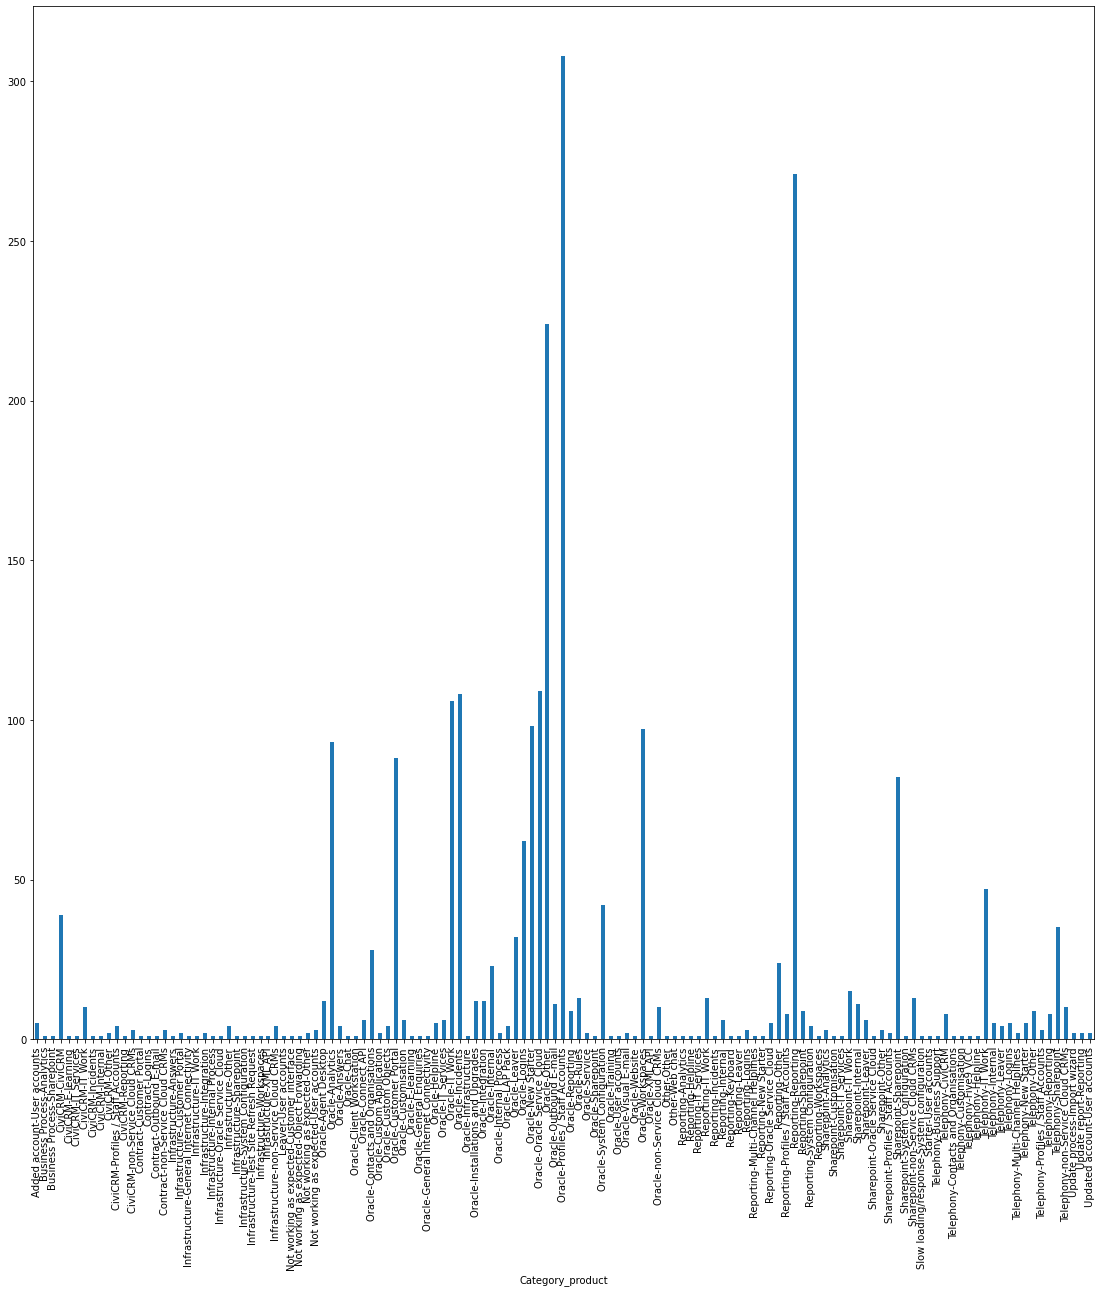

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(19,19))
inc_thread_df.groupby('Category_product').Text.count().plot.bar(ylim=0)
plt.show()

In [39]:
inc_thread_df = inc_thread_df[inc_thread_df['Text'].notna()]

In [40]:
inc_thread_df.shape

(2304, 7)

In [41]:
def decode_text(string):
    result = html.unescape(string)
    return result

In [42]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: decode_text(cw))

In [43]:
inc_thread_df['Text'] = inc_thread_df['Text'].replace(r'https?:\/\/.\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [44]:
inc_thread_df["Text"]=inc_thread_df["Text"].str.lower()

In [45]:
inc_thread_df["Text"]=inc_thread_df["Text"].str.replace('dtype','').str.replace('nanname','').str.replace('hi','')

In [46]:
Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will","'d":" would","'ve":" have","'re":" are"}
def contraction_text(string):
    for key,value in Apos_dict.items():
        if key in string:
            result=string.replace(key,value)
            return result
        else:
            return string

In [47]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: contraction_text(cw))

In [48]:
def punction_text(string):
    result = re.sub(r'[^\w\s]', '', string)
    return result

In [49]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: punction_text(cw))

In [50]:
pattern = r'[0-9]'
def nums_text(string):
    result=re.sub(pattern, '', string)
    return result

In [51]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: nums_text(cw))

In [52]:
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [53]:
inc_thread_df['cat_id'] = inc_thread_df['Category_product'].factorize()[0]
category_id_f2 = inc_thread_df[['Category_product', 'cat_id']].drop_duplicates()

cat_to_id = dict(category_id_f2.values)
id_to_category = dict(category_id_f2[['cat_id', 'Category_product']].values)

In [54]:
inc_thread_df.head(10)

,Incident ID,Text,Status,Subject,CategoryID,ProductID,Category_product,cat_id
28152,11751.0,email verification mike as we discussed ...,Solved,Email Verification,Oracle,Outbound E-mail,Oracle-Outbound E-mail,0
32196,12395.0,nwr customer portal redesign our website ...,Solved,NWR: Customer portal re-design,Oracle,Customer Portal,Oracle-Customer Portal,1
33137,12528.0,ucu cp law extra and future status michael...,Solved,UCU CP Law Extra and Future Status,Oracle,Other,Oracle-Other,2
37213,13055.0,right now bdma tab mail merge i need to...,Solved,Right Now - BDMA Tab Mail Merge,Oracle,Contacts and Organisations,Oracle-Contacts and Organisations,3
42683,13678.0,mind legal sla report cr amend filterssla c...,Solved,Mind - Legal SLA Report - CR - Amend Filters/S...,Oracle,Analytics,Oracle-Analytics,4
42900,13702.0,calm for ca support we need to introduce c...,Solved,CALM For CA Support,Oracle,Oracle Service Cloud,Oracle-Oracle Service Cloud,5
43800,13809.0,change requirest for additional table and impo...,Solved,Change requirest for additional table and impo...,Oracle,Analytics,Oracle-Analytics,4
43847,13811.0,change the country field in caba workspace to ...,Solved,Change the Country field in CABA workspace to ...,Oracle,System Configuration,Oracle-System Configuration,6
44015,13838.0,wiltsre table added to ca support along with a...,Solved,Wiltshire table added to CA support along with...,Oracle,Analytics,Oracle-Analytics,4
44283,13866.0,change request flagging contact incident rec...,Solved,CHANGE REQUEST - Flagging Contact & Incident R...,Oracle,System Configuration,Oracle-System Configuration,6


In [55]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(inc_thread_df.Text)

labels = inc_thread_df.cat_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 2304 complaints is represented by 2280 features (TF-IDF score of unigrams and bigrams)


In [56]:
N = 3
for CategoryID, cat_id in sorted(cat_to_id.items()):
    features_chi = chi2(features, labels == cat_id)
    indices = np.argsort(features_chi[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(CategoryID))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Added account-User accounts:
  * Most Correlated Unigrams are: setup, trbl, creation
  * Most Correlated Bigrams are: oracle object, account object, oracle access

==> Business Process-Analytics:
  * Most Correlated Unigrams are: schedule, scheduled, repor
  * Most Correlated Bigrams are: new starter, rachel birtles, rach ts

==> Business Process-Sharepoint:
  * Most Correlated Unigrams are: nextcheck, maksimovic, approved
  * Most Correlated Bigrams are: sent decemb, email attached, paul maksimovic

==> CiviCRM-CiviCRM:
  * Most Correlated Unigrams are: civi, shaw, healthcare
  * Most Correlated Bigrams are: healthcare crm, civi crm, shaw healthcare

==> CiviCRM-E-learning:
  * Most Correlated Unigrams are: hello, report, demi
  * Most Correlated Bigrams are: hello request, contacting object, demi thank

==> CiviCRM-IT Services:
  * Most Correlated Unigrams are: manager, isname, abbie
  * Most Correlated Bigrams are: dear rachelthank, access request, isname object

==> CiviCRM-IT


==> Oracle-Infrastructure:
  * Most Correlated Unigrams are: change, fro, management
  * Most Correlated Bigrams are: new starter, change request, fro dear

==> Oracle-Installations and Upgrades:
  * Most Correlated Unigrams are: opening, disable, upgrade
  * Most Correlated Bigrams are: craig thanks, portal object, getting ts

==> Oracle-Integration:
  * Most Correlated Unigrams are: integration, janethank, janei
  * Most Correlated Bigrams are: ts fixed, janethank contacting, know object

==> Oracle-Internal:
  * Most Correlated Unigrams are: mouse, nathan, testname
  * Most Correlated Bigrams are: sent westgate, test testname, testname object

==> Oracle-Internal Process:
  * Most Correlated Unigrams are: timas, aaq, identified
  * Most Correlated Bigrams are: change request, advised ts, submitting chan

==> Oracle-LAP Pack:
  * Most Correlated Unigrams are: burnett, environment, lap
  * Most Correlated Bigrams are: sent august, tim burnett, craig thanks

==> Oracle-Leaver:
  * Mos


==> Sharepoint-Profiles / Staff Accounts:
  * Most Correlated Unigrams are: user, logins, create
  * Most Correlated Bigrams are: ellis logins, new user, create new

==> Sharepoint-Sharepoint:
  * Most Correlated Unigrams are: uktv, warrior, sharepoint
  * Most Correlated Bigrams are: warrior programme, sharepoint password, sharepoint object

==> Sharepoint-System Configuration:
  * Most Correlated Unigrams are: november, octobe, maksimovic
  * Most Correlated Bigrams are: ts steven, sent octobe, paul maksimovic

==> Sharepoint-non-Service Cloud CRMs:
  * Most Correlated Unigrams are: parent, reopening, legacy
  * Most Correlated Bigrams are: ts legacy, legacy issue, rach separate

==> Slow loading/response-System configuration:
  * Most Correlated Unigrams are: ts, ellis, issues
  * Most Correlated Bigrams are: contacting crm, new starter, issues object

==> Starter-User accounts:
  * Most Correlated Unigrams are: new, ellis, account
  * Most Correlated Bigrams are: new starter, acco

In [57]:
X=inc_thread_df['Text']
y=inc_thread_df['Category_product']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state = 0)

In [59]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    svm.SVC()
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\s

In [60]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.381062,0.032941
LogisticRegression,0.375844,0.036558
MultinomialNB,0.335483,0.026317
RandomForestClassifier,0.275165,0.012264
SVC,0.355459,0.026516


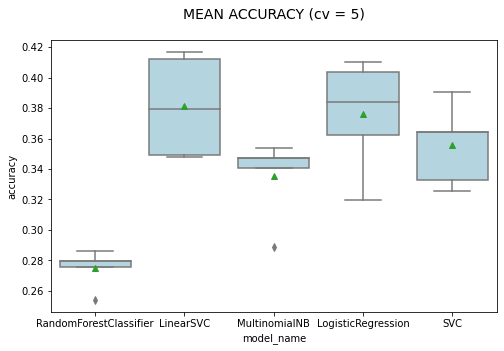

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [62]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               inc_thread_df.index, test_size=0.2, 
                                                               random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [63]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.27      0.23      0.25        13
           2       0.25      0.50      0.33        52
           3       0.00      0.00      0.00         6
           4       0.36      0.24      0.29        17
           5       0.24      0.27      0.26        22
           6       0.00      0.00      0.00        10
           7       0.23      0.20      0.21        15
          11       0.00      0.00      0.00         3
          12       0.12      0.05      0.07        21
          14       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         4
          29       0.00      0.00      0.00         

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               inc_thread_df.index, test_size=0.2, 
                                                               random_state=42)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [65]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.22      0.38      0.28        13
           2       0.32      0.33      0.32        52
           3       0.00      0.00      0.00         6
           4       0.37      0.41      0.39        17
           5       0.24      0.27      0.26        22
           6       0.00      0.00      0.00        10
           7       0.38      0.40      0.39        15
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         3
          12       0.36      0.19      0.25        21
          14       0.00      0.00      0.00         1
          19       1.00      0.33      0.50         3
          20       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       1.00      0.25      0.40         

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 3), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LogisticRegression().fit(tfidf_vectorizer_vectors, y_train)

In [67]:
new_complaint = """Good morning,I have been locked out of my Right Now account, please can you assist?Many thanksHelenHelen TesterWellbeing CoordinatorPharmacist Support5th Floor196 DeansgateManchesterM3 3WFDirect: 0161 441 0811Enquiry Line: 0808 168 2233Website: www.pharmacistsupport.org<http://www.pharmacistsupport.org/>NEW Charity Number:Pharmacist Support is a charitable company limited by guarantee registered in England and Wales with company number 9237609 and charity number 1158974."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Oracle-Profiles / Staff Accounts']


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 3), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [69]:
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Oracle-Profiles / Staff Accounts']
